Number of nodes: 77
Number of edges: 254


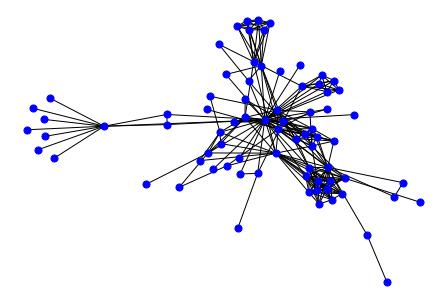

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy import stats

G= nx.read_edgelist("../data/lesmis.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [21]:
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1,k2,variance,av_cl,l,r

In [8]:
k1,k2,variance,av_cl,l,r = measures(G)
X_net = [k1,k2,variance,av_cl,l,r]
print(X_net)

[6.597402597402597, 79.53246753246754, 36.006746500252994, 0.5731367499320135, 2.6411483253588517, -0.16522513442236916]


In [9]:
cl = ['ER','WS','BA']
#ER networks
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(0.0)

#WS networks
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(1.0)

# BA networks
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X.append(x)
    y.append(2.0)

In [10]:
X = np.array(X)
y = np.array(y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predição no conjunto de teste

Xnet: (1, 6)


KNeighborsClassifier(metric='euclidean')

In [11]:
y_pred = model.predict(X_net) 
print('Classe:', cl[int(y_pred)])

Classe: ER


Social:
 * Terrorists: https://networks.skewed.de/net/terrorists_911#None_draw
 * Windsurfers: http://konect.cc/networks/moreno_beach/
 * Karate: http://konect.cc/networks/ucidata-zachary/
 
Biological:
 * Zebra: http://konect.cc/networks/moreno_zebra/
 * Sheep: http://konect.cc/networks/moreno_sheep/
 * HIV: http://konect.cc/networks/hiv/
 
Technological:
 * Unicode: http://konect.cc/networks/unicodelang/
 * Facebook: http://konect.cc/networks/ego-facebook/
 * Air Traffic: http://konect.cc/networks/maayan-faa/

In [14]:
def get_graph_from_data_file(file_name=None, plot=False):
    
    """
    Defines a NetworkX graph based on data from file. 
    Plots a visual representation of the graph 
    """
    
    file_path = "networks/" + file_name
    
    G = nx.read_edgelist(file_path, nodetype=int, data=(("weight", float),))
        
    
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    if plot:
        pos = nx.spring_layout(G)
        nx.draw(G, pos, node_color='b', node_size=50, with_labels=False)
    
    return G

In [15]:
g_1 = get_graph_from_data_file("bio_hiv")
g_2 = get_graph_from_data_file("bio_sheep")
g_3 = get_graph_from_data_file("bio_zebra")
g_4 = get_graph_from_data_file("soc_beach")
g_5 = get_graph_from_data_file("soc_karate")
g_6 = get_graph_from_data_file("soc_terrorist")
g_7 = get_graph_from_data_file("tec_dimacs10")
g_8 = get_graph_from_data_file("tec_facebook")
g_9 = get_graph_from_data_file("tec_faa")

In [29]:
measures(g_8)

(2.064404432132964,
 528.1315789473684,
 523.8698132879582,
 0.027247421431211827,
 3.8674212512485524,
 -0.6682140067239861)